# Liset ripples example usage

## Create a liset_tk instance
Liset_tk object has all the functionalities for loading, visualizing and doing predictions on the data. <br><br>
#### <span style="color:#24938b;">***Class***</span> `liset_tk()`
- **Inputs**
    - *data_path:* should be the path to the folder where the **.dat** file and **info.mat** live in. Optionally it can have a .csv file with the ground truth events of the desired signals. 
    - *shank:* The shank of electrodes chosen to get from the recording. _(Only one shank at a time)_
    - *downsample:* Downsamples the data from its original FS to **1250Hz**
    - *numSamples (Optional):* If reading a dataset too big, it can be only loaded X number of samples with this parameter.

In [8]:
# Import the class from the liset_tk.py file
from liset_tk import liset_tk

# Define the path to your data
path = r'C:\__NeuroSpark_Liset_Dataset__\neurospark_mat\CNN TRAINING SESSIONS\Amigo2_1_hippo_2019-07-11_11-57-07_1150um' # Modify this to your data path folder
liset = liset_tk(data_path=path, shank=3, downsample=True, verbose=True,start=1000000, numSamples=1000000)

Downsampling data from 30000 Hz to 1250 Hz... Done!
Normalizing data... Done!
Shape of loaded data after downsampling and z-score:  (41667, 8)


In [2]:
import numpy as np

array = np.array([1,2])

np.save('../../../runSNN/predictions.npy', arr=array, allow_pickle=True)  

## Data visualization
### Overview data features

In [9]:
# Explore the loaded data.

print(f'Original Sampling Frequency: {liset.original_fs} Hz')
print(f'Current Sampling Frequency: {liset.fs} Hz')
print(f'Shape of the loaded data: {liset.data.shape}')
print(f'Duration of the loaded data: {liset.duration} seconds')
print('\n')
if liset.has_ripples:
    print(f'Number of loaded GT ripples: {len(liset.ripples_GT)}')
    print(f'Overview of the ripples:\n\n{liset.ripples_GT[0:5]}\n...')

Original Sampling Frequency: 30000 Hz
Current Sampling Frequency: 1250 Hz
Shape of the loaded data: (41667, 8)
Duration of the loaded data: 33.3336 seconds


Number of loaded GT ripples: 27
Overview of the ripples:

[[35.0002577  35.04147245]
 [35.11630976 35.1651167 ]
 [34.68355488 34.72476963]
 [34.52303427 34.59895618]
 [36.94602777 36.99158091]]
...


## Visualize the data

#### <span style="color:#24938b;">***function***</span> `liset.plot_data()`
- **Inputs**
    - *time_window*: ***Any***
    - *offset*: ***float***, default: ***0***
    - *extend*: ***bool***, default: ***False***

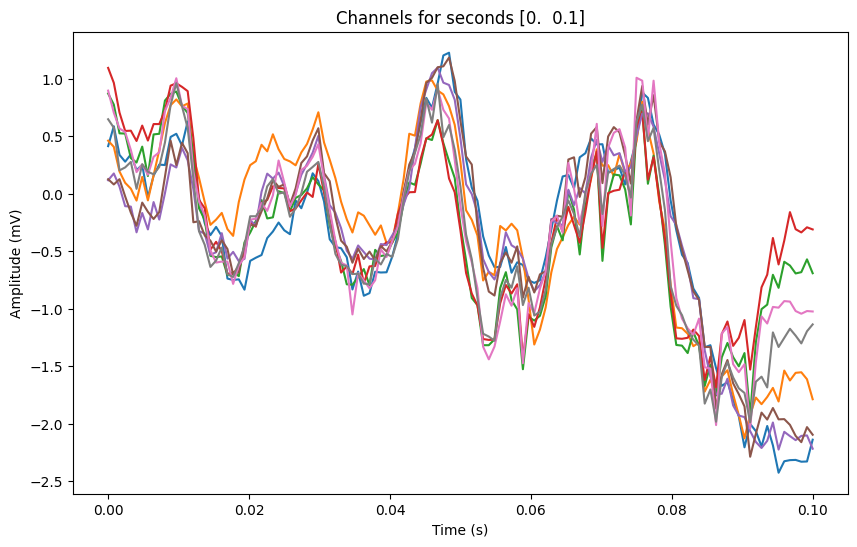

In [10]:
# Plot the loaded channels in a time window.
window = [0, 0.1]
liset.plot_data(window)

# Play with the different parameters (uncomment to try):
# offset = 1
# extend = 1
# liset.plot_data(window, offset=offset, extend=extend)

#### <span style="color:#24938b;">***function***</span> `liset.plot_ripple()`
- **Inputs**
    - *idx*: ***int***
    - *offset*: ***float***, default: ***0***
    - *extend*: ***bool***, default: ***False***
    - *delimiter*: ***bool***, default: ***False***

Plot the time window for the ripple index. <br>Winfow to be plot = **(** <span style="color:#3498db;">**start:**</span> ripples[<span style="color:red;">**idx**</span>][0], <span style="color:#3498db;">**end:**</span> ripples[<span style="color:red;">**idx**</span>][1] **)**


Ripple [2021, 2196]
before subplots!


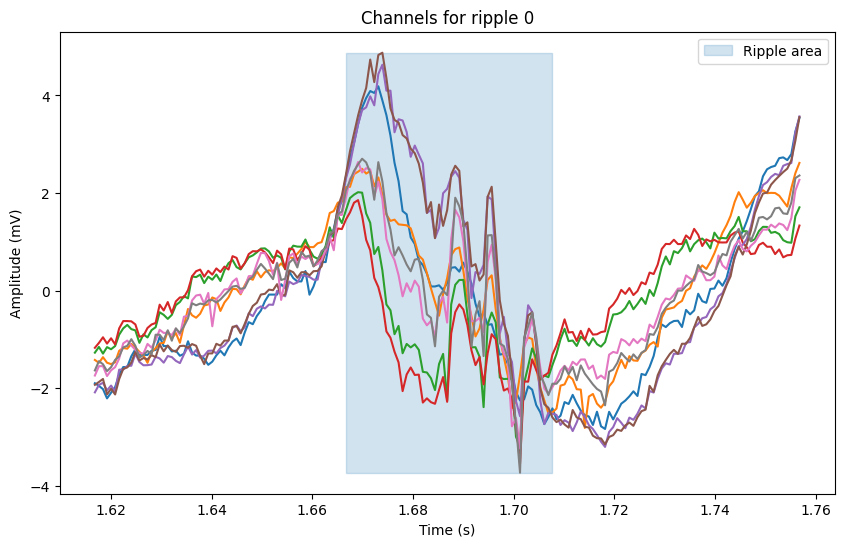

In [11]:
# Plot the loaded channels in a time window.
idx = 0

liset.plot_ripple(idx, extend=0.05, delimiter=True)

# Play with the different parameters (uncomment to try):
# offset = 0
# extend = 0.1
# delimiter = True
# liset.plot_ripple(idx, offset=offset, extend=extend, delimiter=delimiter)

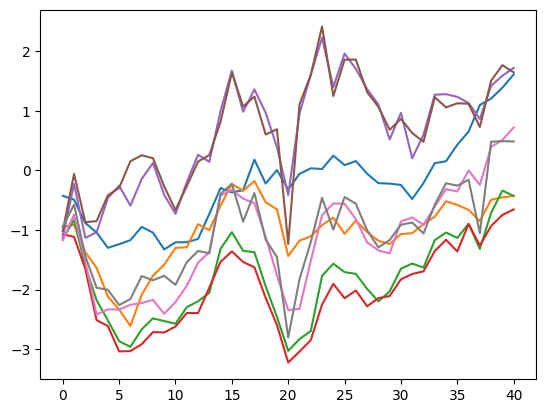

In [82]:
import matplotlib.pyplot as plt

plt.plot(liset.window)

## Load Tensorflow Keras Model
(Other models to be implemented... ) <br><br>
Model folder should have this structure: <br><br>
<img src="img/model_structure.png" alt="Model Structure" width="600"/> <br>

#### <span style="color:#24938b;">***function***</span> `liset.load_model()`
- **Inputs**
    - *model_path:* ***str***

In [5]:
# Put the correct path to your tensorflow model
model_path = '../rippl-AI/optimized_models/CNN1D_1_Ch8_W60_Ts16_OGmodel12' # Change this to your path
liset.load_model(model_path)

# Overview the structure of the loaded model.
print(liset.model.summary())

Loading CNN model... WARNING:tensorflow:From c:\Users\marco\miniconda3\envs\rippl_AI_env\lib\site-packages\keras\src\saving\legacy\saved_model\load.py:107: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.


Done!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 4)           68        
                                                                 
 batch_normalization (Batch  (None, None, 4)           16        
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, None, 4)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 2)           10        
                                                                 
 batch_norm

## Predict with the loaded model

#### <span style="color:#24938b;">***function***</span> `liset.predict()`
- **Inputs**
    - *threshold (Default=0.7):* ***float***

Use the <span style="color:#3498db;">***predict function***</span> to predict the ripple times. 
The function gets the input size of the loaded model and prepares the data to iterate all through, so the number of predictions will depend on the model input size and the lenght of the data.

In [6]:
liset.predict(threshold=0.2)
print(liset.prediction_times)

163/163 [==============================] - 1s 6ms/step
[[ 1.3824  1.3944]
 [ 1.3888  1.4008]
 [ 2.2848  2.2968]
 [ 2.2912  2.3032]
 [ 2.2976  2.3096]
 [ 2.304   2.316 ]
 [ 2.3104  2.3224]
 [ 2.3168  2.3288]
 [ 2.7072  2.7192]
 [ 2.7136  2.7256]
 [ 2.7264  2.7384]
 [ 2.7712  2.7832]
 [ 2.7776  2.7896]
 [ 9.0752  9.0872]
 [10.6624 10.6744]
 [10.8032 10.8152]
 [11.2448 11.2568]
 [11.3216 11.3336]
 [11.328  11.34  ]
 [11.5136 11.5256]
 [11.52   11.532 ]
 [11.5264 11.5384]
 [12.5504 12.5624]
 [12.7168 12.7288]
 [12.7232 12.7352]
 [12.7296 12.7416]
 [12.736  12.748 ]
 [12.7424 12.7544]
 [12.7488 12.7608]
 [12.7616 12.7736]
 [13.5808 13.5928]
 [13.6    13.612 ]
 [13.6512 13.6632]
 [16.8576 16.8696]
 [16.864  16.876 ]
 [16.8704 16.8824]
 [16.8768 16.8888]
 [17.824  17.836 ]
 [17.8304 17.8424]
 [17.9264 17.9384]
 [18.0288 18.0408]
 [18.0352 18.0472]
 [18.0416 18.0536]
 [18.1696 18.1816]
 [18.176  18.188 ]
 [18.1888 18.2008]
 [18.3616 18.3736]
 [18.4512 18.4632]
 [18.4704 18.4824]
 [18.4832 18.4

## Plot the predictions on the data

#### <span style="color:#24938b;">***function***</span> `liset.plot_predictions()`
- **Inputs**
    - *k:* ***float*** (starting second to be ploted)
    - *duration <span style="color:#3498db;">Optional (default is 1)</span>: ***float*** (duration in seconds of the plot from the starting point k)* <br><br>

Overview the accuracy of the model compared to the ground truth events.

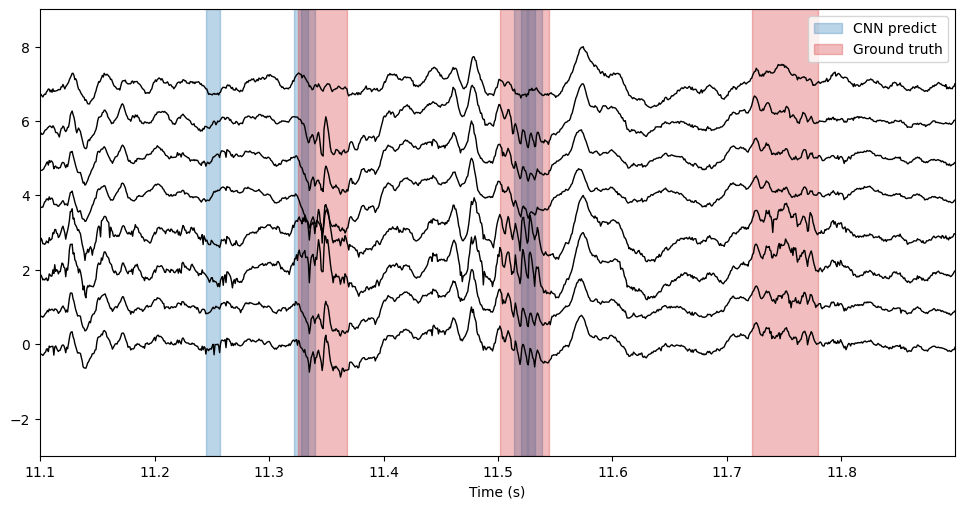

In [7]:
k = 11.1
duration = 0.8
liset.plot_predictions(k, duration=duration)

## Check the performance of the model numerically

#### <span style="color:#24938b;">***function***</span> `liset.check_performance()`
- **Inputs**
    - *show:* ***bool*** (whether to show or not the plot) <br>
    - *criteria:* ***bool*** (Show criteria to define the performance)

Compute the performance quantitatively of the model with the loaded data (from 0 - 1).

In [10]:
liset.check_performance(show=False, criteria=True)

val = missed_ripples/total * 1.3 + false_positives/total * 0.8


From liset_aux.py
function custom_performance_sigmoid(val, k=2) --> 0.4958148908963982

    return  2 - (1 / (1 + math.exp(-k * x))) * 2


Where k is the slope parameter (default is 2)


                


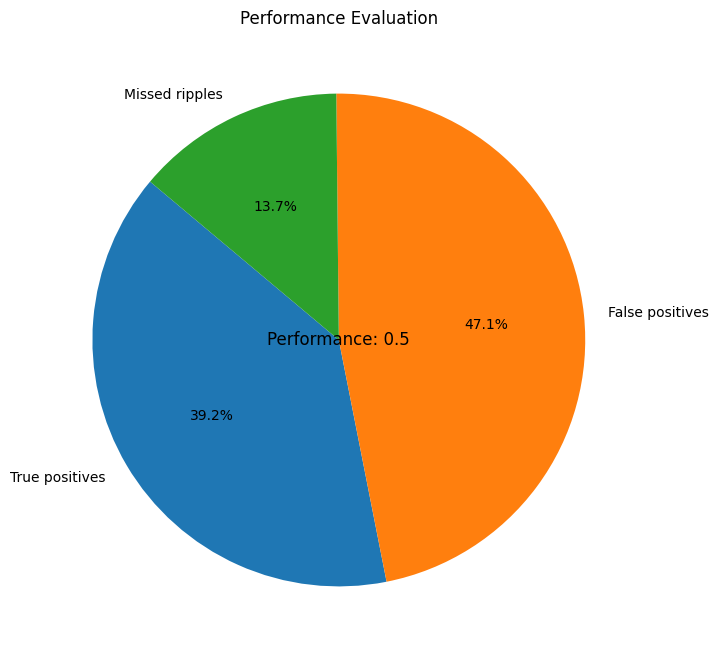

In [9]:
liset.check_performance(show=True)